In [ ]:
!pip install arch -q
!pip install yfinance -q

     |████████████████████████████████| 903 kB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 41.1 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 


In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from arch import arch_model

In [ ]:
sp500 = pd.DataFrame(yf.Ticker('^GSPC').history(period="max"))
sp500['date'] = sp500.index
sp500.head()
sp500Month = sp500.Close
sp500Month.index = pd.to_datetime(sp500.index)
sp500Month = sp500Month.resample('1M').mean()

Returns

In [ ]:
returns = 100 * sp500Month.pct_change().dropna()

In [ ]:
len(returns)

871

Log Returns

In [ ]:
log_returns = np.log(sp500Month/sp500Month.shift(1)).dropna()

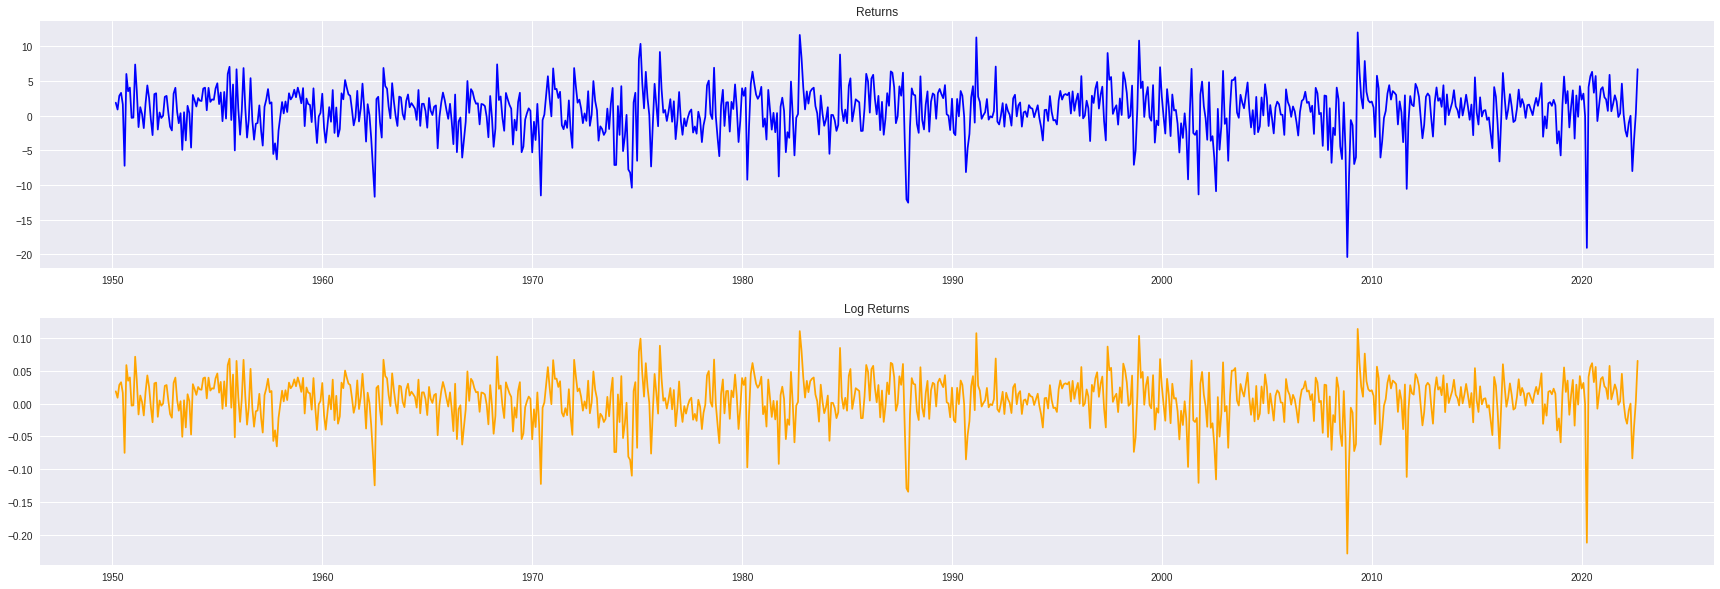

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(30,10))

ax1.plot(returns, color="blue")
ax1.set_title("Returns")


ax2.plot(log_returns, color="orange")
ax2.set_title("Log Returns")

fig.show()

In [ ]:
returns.describe()

count    871.000000
mean       0.695861
std        3.468612
min      -20.395836
25%       -1.000440
50%        1.001209
75%        2.883201
max       12.022436
Name: Close, dtype: float64

In [ ]:
from scipy import stats

In [ ]:
def getScores(test, forecast):
  mse = mean_squared_error(test, forecast)
  print('MSE: '+str(mse))

  mae = mean_absolute_error(test, forecast)
  print('MAE: '+str(mae))

  rmse = np.sqrt(mean_squared_error(test, forecast))
  print('RMSE: '+str(rmse))

  mape = mean_absolute_percentage_error(test, forecast)
  print('MAPE: '+str(mape))

In [ ]:
def get_volatility(ts, window = None):
  if window:
    ma = ts.rolling(window).mean()
  else:
    ma = ts.expanding().mean()
  output = ((ts - ma)**2)**.5

  return output;

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


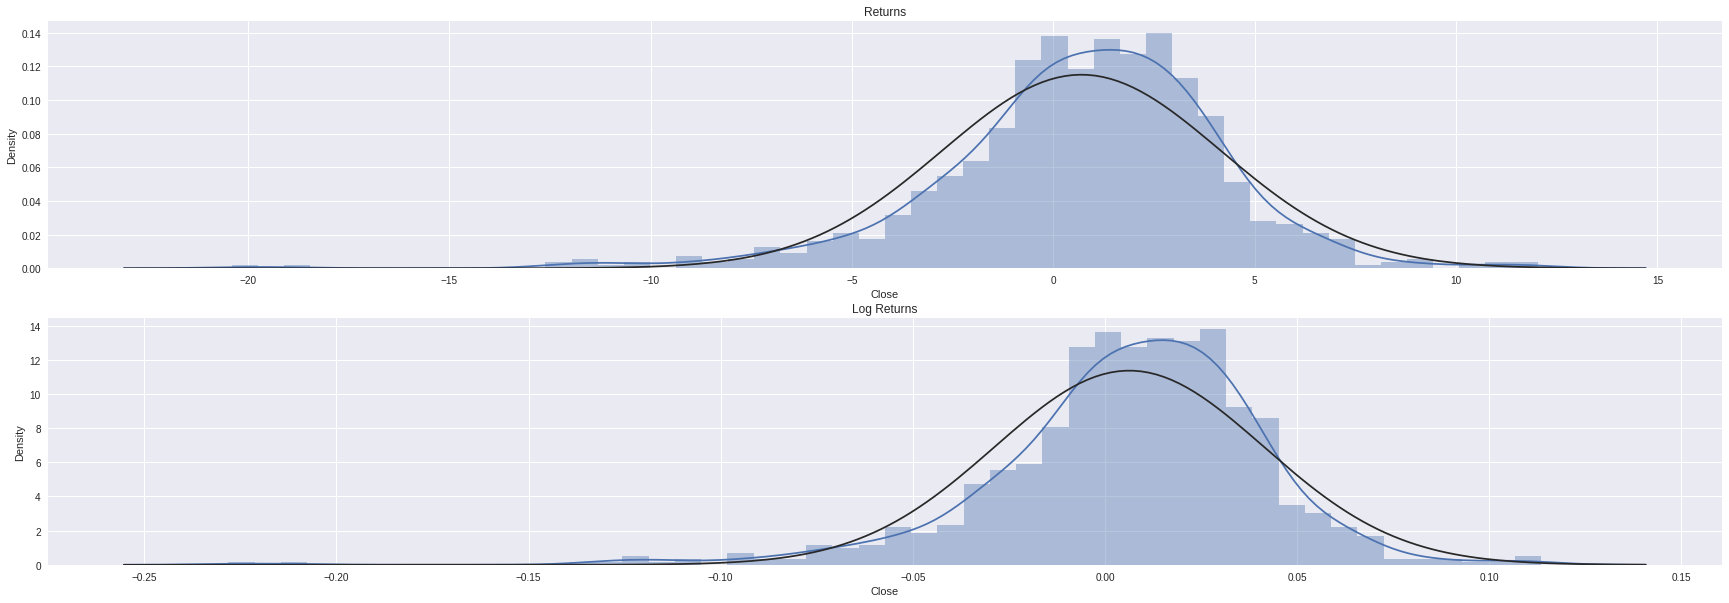

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(30,10))

sns.distplot(returns, norm_hist=True, fit=stats.norm, bins=50, ax=ax1)
ax1.set_title("Returns")


sns.distplot(log_returns, norm_hist=True, fit=stats.norm, bins=50, ax=ax2)
ax2.set_title("Log Returns")

fig.show()

In [ ]:
# split_time_1 = int(len(sp500Month) * 0.8)
# split_time_2 = int(len(sp500Month) * 0.95)

# # 80%
# # 95%
# # 100%

# # Train, validate and test

# train_idx = returns.index[:split_time_1]
# val_idx = returns.index[split_time_1:split_time_2]
# test_idx = returns.index[split_time_2:]

In [ ]:
# ts_train = returns[train_idx]
# ts_val = returns[val_idx]
# ts_test = returns[test_idx]

In [ ]:
historical_volatility = get_volatility(returns)

In [ ]:
historical_volatility.describe()

count    871.000000
mean       2.544963
std        2.340219
min        0.000000
25%        0.930531
50%        1.982333
75%        3.409126
max       21.032353
Name: Close, dtype: float64

In [ ]:
train, test = train_test_split(historical_volatility, shuffle=False, train_size=0.9)

In [ ]:
WINDOW_SIZE = 1

In [ ]:
ma = returns.rolling(WINDOW_SIZE).mean()
ewma = returns.ewm(span=WINDOW_SIZE).mean()

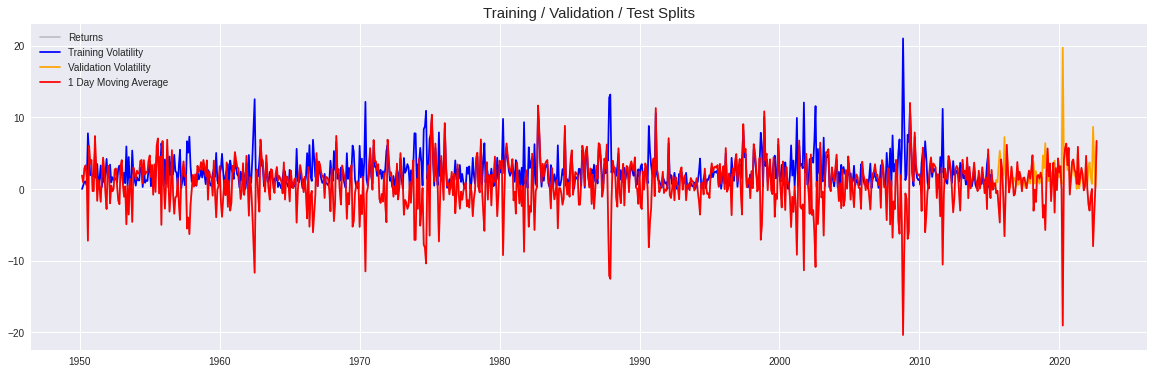

In [ ]:
plt.figure(figsize=(20,6))

plt.plot(returns, color='gray', label='Returns', alpha=0.4)
plt.plot(train, color='blue', label='Training Volatility')
plt.plot(test, color='orange', label='Validation Volatility')

plt.plot(ma, color='red', 
         label=f'{WINDOW_SIZE} Day Moving Average')


plt.plot()
plt.title('Training / Validation / Test Splits', fontsize=15)
plt.legend()
plt.show();

In [ ]:
# CALCULATE THE MEAN OF TRAINING DATA
mean_train_vololatility = train.mean()
mean_train_vololatility

2.5532140899245603

In [ ]:
from arch.__future__ import reindexing

In [ ]:
gm_1 = arch_model(train, vol='GARCH', p=1, q=1,
                  mean='constant', dist='normal')
gm_1_fit = gm_1.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4059.0633371921213
Iteration:      2,   Func. Count:     14,   Neg. LLF: 175794.4675179954
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1748.1244731961476
Iteration:      4,   Func. Count:     28,   Neg. LLF: 1749.3083531013865
Iteration:      5,   Func. Count:     34,   Neg. LLF: 1751.265643894476
Iteration:      6,   Func. Count:     40,   Neg. LLF: 1751.3450946654998
Iteration:      7,   Func. Count:     46,   Neg. LLF: 1745.1453318904237
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1731.1377520667606
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1909.1179077671673
Iteration:     10,   Func. Count:     64,   Neg. LLF: 1726.6714579343547
Iteration:     11,   Func. Count:     69,   Neg. LLF: 1726.6594402768085
Iteration:     12,   Func. Count:     74,   Neg. LLF: 1726.6590759500225
Iteration:     13,   Func. Count:     79,   Neg. LLF: 1726.6590448425127
Iteration:     14,   Func. Count:     83,   Neg. LLF:

In [ ]:
print(gm_1_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1726.66
Distribution:                  Normal   AIC:                           3461.32
Method:            Maximum Likelihood   BIC:                           3479.97
                                        No. Observations:                  783
Date:                Tue, Aug 16 2022   Df Residuals:                      782
Time:                        10:14:36   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.2519      0.111     20.340  5.648e-92 [  2.035,  2.46

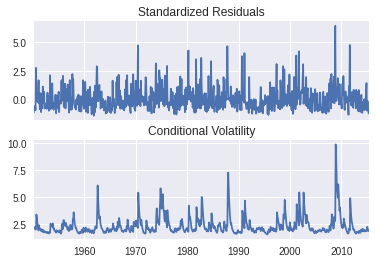

In [ ]:
gm_1_fit.plot()
plt.show();

In [ ]:
split_date = train.index[-1]
split_date

Timestamp('2015-04-30 00:00:00', freq='M')

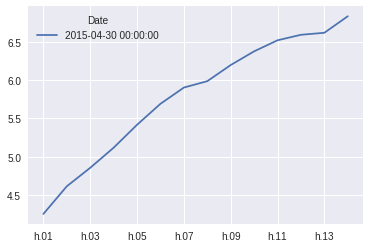

In [ ]:
forecasts = gm_1_fit.forecast(horizon=14, method='simulation')
trans = forecasts.variance.transpose()
trans.plot()
# forecasts.variance[split_date:].plot()

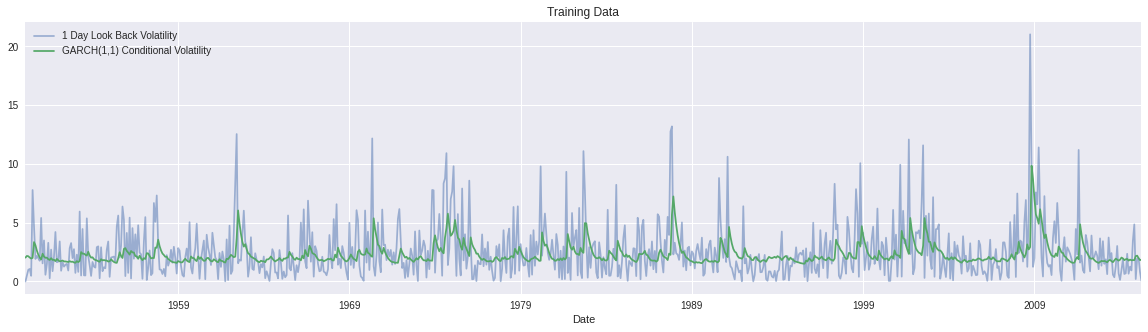

In [ ]:
plt.figure(figsize=(20,5))

train.plot(label=f'{WINDOW_SIZE} Day Look Back Volatility', 
               alpha=0.5)

gm_1_fit.conditional_volatility.plot(label='GARCH(1,1) Conditional Volatility')
plt.title('Training Data')
plt.legend();

In [ ]:
def predict_dates(num_prediction):
    last_date = sp500Month.index.values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq="M")
    return prediction_dates

In [ ]:
pred_dates = predict_dates(14)[1:]
pred_dates

DatetimeIndex(['2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
# ROLLING FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(test)):
    idx = test.index[i]
    ts_train = historical_volatility[:idx]
    print(idx)
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, vol='GARCH', p=1, q=1,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5
    
    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [ ]:
# ROLLING FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = historical_volatility

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(pred_dates)):
    # idx = test.index[i]
    ts_train = rolling_forecasts[:idx]
    print(idx)
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(rolling_forecasts, vol='GARCH', p=1, q=1,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')
    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5
    rolling_forecasts.loc[pred_dates[i]] = pred

    # APPEND TO rolling_forecasts LIST


In [ ]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 2288.2879135259755
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2288.286401065272
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8


In [ ]:
forecasts = res.forecast(horizon=15, reindex=False)
print(forecasts.residual_variance.iloc[-3:])

                 h.01       h.02       h.03       h.04       h.05       h.06  \
Date                                                                           
2022-08-31  17.481356  16.939714  16.461209  16.038482  15.665031  15.335113   

                 h.07       h.08       h.09       h.10       h.11      h.12  \
Date                                                                          
2022-08-31  15.043652  14.786166  14.558694  14.357738  14.180207  14.02337   

                 h.13       h.14       h.15  
Date                                         
2022-08-31  13.884816  13.762412  13.654276  


In [ ]:
transposed = forecasts.variance.transpose()

In [ ]:
forh = pd.DataFrame(transposed)
forh

Date,2022-08-31
h.01,17.481356
h.02,16.939714
h.03,16.461209
h.04,16.038482
h.05,15.665031
h.06,15.335113
h.07,15.043652
h.08,14.786166
h.09,14.558694
h.10,14.357738


In [ ]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2022-08-31  0.797347
                  h.1
Date                 
2022-08-31  17.481356
                  h.1
Date                 
2022-08-31  17.481356


DIRTY QUANT

In [ ]:
def run_garch_model(returns):
    # using GARCH 1-1 with Skewed Student-t Distribution of returns
    am = arch_model(returns, p=1, q=1, dist='skewt')
    res = am.fit(disp='off')
    return res

In [ ]:
def simulate_returns(garch_parameters, num_days_to_simulate = 1000):
    sim_mod = arch_model(None, p=1, q=1, dist="skewt")
    sim_data = sim_mod.simulate(garch_parameters, num_days_to_simulate)
    return sim_data['data']

In [ ]:
def simulate_many_returns(returns, num_sims=10, num_days_to_simulate=1000):
    sim_df = pd.DataFrame(index = range(num_days_to_simulate), columns = range(num_sims))
    res = run_garch_model(returns)
    garch_parameters = res.params
    for i in range(num_sims):
        simulated_returns = simulate_returns(garch_parameters, num_days_to_simulate)
        sim_df.loc[:,i] = simulated_returns
    return sim_df  

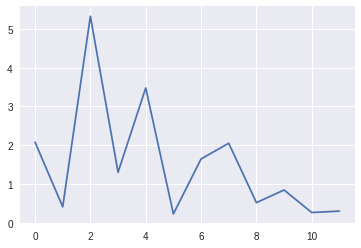

In [ ]:
sim_df = simulate_many_returns(historical_volatility, num_sims=1, num_days_to_simulate=12)
sim_df.plot(legend=False)

In [ ]:
sim_mod = arch_model(train, p=1, q=1, dist="skewt")
sim_mod = sim_mod.fit(disp='off')

sim = arch_model(train, p=1, q=1, dist="skewt")
sim_data = sim.simulate(params=sim_mod.params,nobs=len(test))

res = pd.DataFrame(sim_data['data'])
res = res.set_index(test.index)




In [ ]:
res = res.rename(columns={'data': 'Close'})

In [ ]:
getScores(test, res)

MSE: 13.551684139393986
MAE: 2.61475009717488
RMSE: 3.681261215859856
MAPE: 16.861726500944524


In [ ]:
pred_dates[0]

Timestamp('2022-09-30 00:00:00', freq='M')

WORKING EXAMPLE

In [ ]:
rolling_predictions = []
to_train = pd.DataFrame(returns)
ffc = pd.DataFrame(index=pred_dates, columns=['Close'])

for i in range(len(pred_dates)):  
    train = to_train[:-(len(pred_dates)-i)]
    print(to_train[-1:])
    model = arch_model(to_train, p=1, q=1, dist='skewt')
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=5)
    value = np.sqrt(pred.variance.values[-1,:][0])
    rolling_predictions.append(value)
    ffc.iloc[i] = value
    to_train = to_train.append( [ffc.iloc[i]])


to_train
# ffc
    # value = pd.DataFrame(value, columns=["Close"])
    # value = value.set_index(pred_dates[i])



               Close
Date                
2022-08-31  6.717386
               Close
2022-09-30  4.097032
               Close
2022-10-31  3.973683
               Close
2022-11-30  3.859241
               Close
2022-12-31  3.753456
               Close
2023-01-31  3.655871
               Close
2023-02-28  3.566026
               Close
2023-03-31  3.483537
              Close
2023-04-30  3.40786
               Close
2023-05-31  3.338671
              Close
2023-06-30  3.27539
               Close
2023-07-31  3.217671
              Close
2023-08-31  3.16507
               Close
2023-09-30  3.117206


,Close
1950-02-28,1.878814
1950-03-31,0.894237
1950-04-30,2.875165
1950-05-31,3.302180
1950-06-30,1.639707
...,...
2023-06-30,3.275390
2023-07-31,3.217671
2023-08-31,3.165070
2023-09-30,3.117206


,Close
2015-07-31,-0.244847
2015-08-31,-2.591867
2015-09-30,-4.679906
2015-10-31,4.135478
2015-11-30,2.755997
...,...
2023-06-30,3.275390
2023-07-31,3.217671
2023-08-31,3.165070
2023-09-30,3.117206


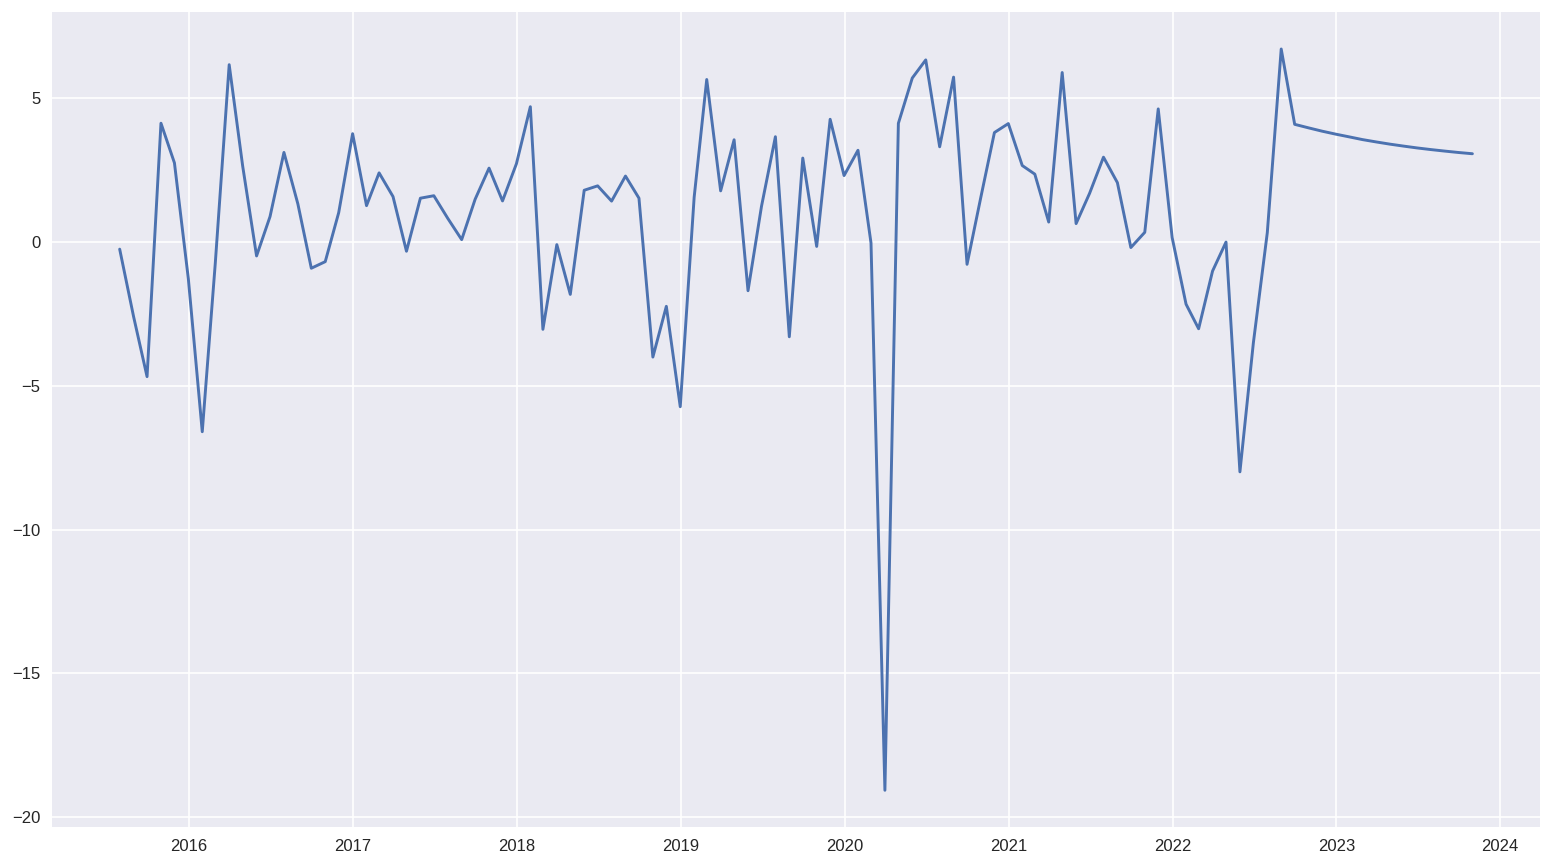

In [ ]:
fig, ax  = plt.subplots(figsize=(16,9), dpi=120)

ax.plot(to_train[-100:], label="Trening")
to_train[-100:]

In [ ]:
returns.append(pd.Series(10))

1950-02-28 00:00:00     1.878814
1950-03-31 00:00:00     0.894237
1950-04-30 00:00:00     2.875165
1950-05-31 00:00:00     3.302180
1950-06-30 00:00:00     1.639707
                         ...    
2022-05-31 00:00:00    -7.991627
2022-06-30 00:00:00    -3.500018
2022-07-31 00:00:00     0.327853
2022-08-31 00:00:00     6.717386
0                      10.000000
Length: 872, dtype: float64

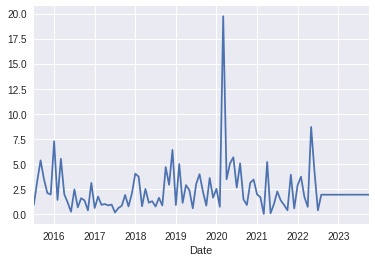

In [ ]:
rolling_forecasts[-100:].plot()

In [ ]:
rolling_predictions = pd.Series(rolling_forecasts, index=test.index)

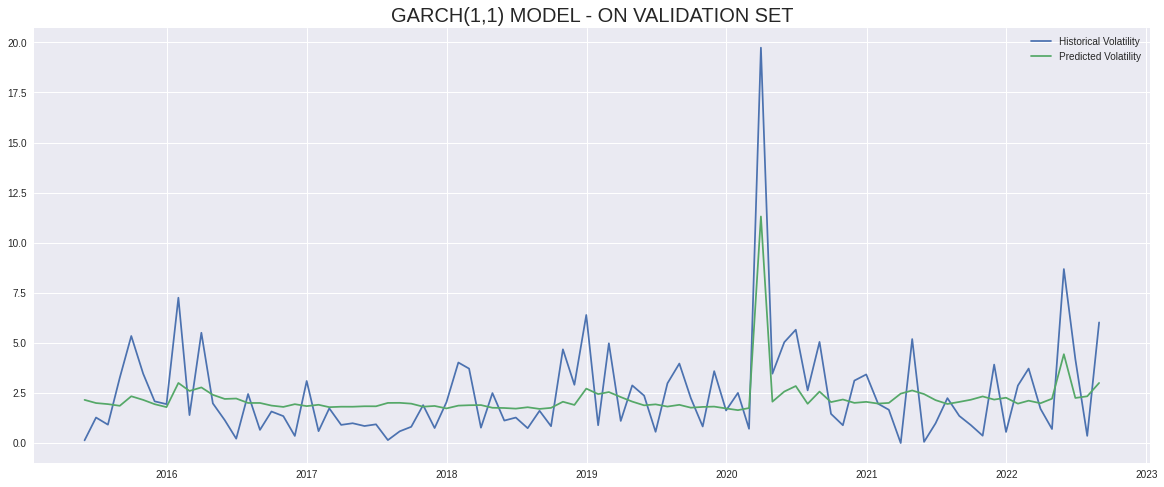

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(test, label='Historical Volatility')
# plt.plot(ts_val, color='gray', alpha=0.4, label='True Returns')
plt.plot(rolling_predictions, label='Predicted Volatility')

plt.title(f'GARCH(1,1) MODEL - ON VALIDATION SET', fontsize=20)
plt.legend();

In [ ]:
https://github.com/chibui191/bitcoin_volatility_forecasting/blob/main/Notebooks/Exploratory/book1.ipynb

In [ ]:
getScores(test, rolling_forecasts)

MSE: 4.913971560922746
MAE: 1.6960415048378197
RMSE: 2.2167479696444397
MAPE: 12.343915627276196


NN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf

from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler


In [ ]:
tenYrs = 252 * 10
tenYrsData = returns[-tenYrs:]

close_data = tenYrsData.values
close_data = close_data.reshape((-1,1))

split_percent = 0.90
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = tenYrsData.index[:split]
date_test = tenYrsData.index[split:]

print(len(close_train))
print(len(close_test))

2268
252


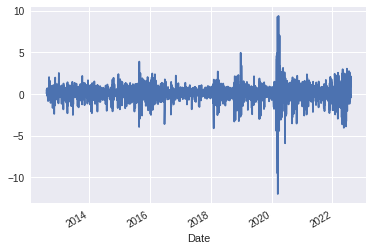

In [ ]:
tenYrsData.plot()

In [ ]:
look_back = 15
from keras.preprocessing.sequence import TimeseriesGenerator

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(look_back,1),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu', ))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 20
model.fit(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/20
113/113 [==============================] - 10s 54ms/step - loss: 1.1149
Epoch 2/20
113/113 [==============================] - 6s 54ms/step - loss: 1.1108
Epoch 3/20
113/113 [==============================] - 6s 55ms/step - loss: 1.1069
Epoch 4/20
113/113 [==============================] - 6s 54ms/step - loss: 1.6538
Epoch 5/20
113/113 [==============================] - 6s 55ms/step - loss: 1.1085
Epoch 6/20
113/113 [==============================] - 8s 70ms/step - loss: 1.1064
Epoch 7/20
113/113 [==============================] - 6s 55ms/step - loss: 1.1052
Epoch 8/20
113/113 [==============================] - 6s 55ms/step - loss: 1.1119
Epoch 9/20
113/113 [==============================] - 6s 54ms/step - loss: 1.1075
Epoch 10/20
113/113 [==============================] - 6s 54ms/step - loss: 1.1061
Epoch 11/20
113/113 [==============================] - 6s 55ms/step - loss: 1.1052
Epoch 12/20
113/113 [==============================] - 6s 54ms/step - loss: 1.1074
Epoch 13/20


In [ ]:
prediction = model.predict(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))


In [ ]:
prediction = np.array(prediction)

In [ ]:
len(date_test), len(prediction)

(252, 237)

In [ ]:
import plotly.graph_objs as go

In [ ]:
trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Trening podaci'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Predikcija'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Test podaci'
)
layout = go.Layout(
    title = "S&P 500",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

In [ ]:
close_data = close_data.reshape((-1))

In [ ]:
def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = sp500.index.values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

In [ ]:
num_prediction = 300
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [ ]:
trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Trening podaci'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Test prognoza'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Test podaci'
)
trace4 = go.Scatter(
    x = forecast_dates,
    y = forecast,
    mode='lines',
    name = 'Prognoza'
)
layout = go.Layout(
    title = "SP500",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()

In [ ]:
import datetime
import time
from arch import arch_model
import matplotlib.pyplot as plt
from numba import jit
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ret = 100 * (sp500.Close.pct_change()[1:])
realized_vol = ret.rolling(5).std()

In [ ]:
from sklearn.svm import SVR
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV

realized_vol = ret.rolling(5).std() 
realized_vol = pd.DataFrame(realized_vol)
realized_vol.reset_index(drop=True, inplace=True)

returns_svm = ret ** 2
returns_svm = returns_svm.reset_index()
del returns_svm['Date']

X = pd.concat([realized_vol, returns_svm], axis=1, ignore_index=True)
X = X[4:].copy()
X = X.reset_index()
X.drop('index', axis=1, inplace=True)
realized_vol = realized_vol.dropna().reset_index()
realized_vol.drop('index', axis=1, inplace=True)

svr_poly = SVR(kernel='poly', degree=2) 
svr_lin = SVR(kernel='linear') 
svr_rbf = SVR(kernel='rbf') 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
n = 252

model = keras.Sequential(
[layers.Dense(256, activation="relu"),
layers.Dense(128, activation="relu"),
layers.Dense(1, activation="linear"),]) 

model.compile(loss='mse', optimizer='rmsprop') 

epochs_trial = np.arange(100, 400, 4) 
batch_trial = np.arange(100, 400, 4) 
DL_pred = []
DL_RMSE = []
for i, j, k in zip(range(4), epochs_trial, batch_trial):
  model.fit(X.iloc[:-n].values,
  realized_vol.iloc[1:-(n-1)].values.reshape(-1,),
  batch_size=k, epochs=j, verbose=True) 
  DL_predict = model.predict(np.asarray(X.iloc[-n:])) 
  DL_RMSE.append(np.sqrt(mse(realized_vol.iloc[-n:] / 100,
  DL_predict.flatten() / 100))) 
  DL_pred.append(DL_predict)
  print('DL_RMSE_{}:{:.6f}'.format(i+1, DL_RMSE[i]))
DL_RMSE_1:0.000551
DL_RMSE_2:0.000714
DL_RMSE_3:0.000627
DL_RMSE_4:0.000739

DL_predict = pd.DataFrame(DL_pred[DL_RMSE.index(min(DL_RMSE))])
DL_predict.index = ret.iloc[-n:].index

plt.figure(figsize=(10, 6))
plt.plot(realized_vol / 100,label='Realized Volatility')
plt.plot(DL_predict / 100,label='Volatility Prediction-DL')
plt.title('Volatility Prediction with Deep Learning',  fontsize=12)
plt.legend()
plt.show()

Epoch 1/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1509
Epoch 2/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1442
Epoch 3/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0956
Epoch 4/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0897
Epoch 5/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0767
Epoch 6/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0745
Epoch 7/100
181/181 [==============================] - 0s 3ms/step - loss: 0.0762
Epoch 8/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0686
Epoch 9/100
181/181 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 10/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0663
Epoch 11/100
181/181 [==============================] - 1s 3ms/step - loss: 0.1101
Epoch 12/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 13/100


ValueError: ignored